1. Data Import and Cleaning
1.1. Import data into a DataFrame, 
we used pandas to read the data file in CSV format.

In [79]:
import pandas as pd

# Replace 'path_to_file.csv' with your file path
data = pd.read_csv('owid_covid_latest.csv')

# Display the first few rows
print(data.head())

# Get an overview of the data types and missing values
print(data.info())

# Check for the presence of NaNs
print(data.isnull().sum())

FileNotFoundError: [Errno 2] No such file or directory: 'owid_covid_latest.csv'

1.2. Clean missing or inconsistent data Identify and handle missing values, remove duplicates, and handle outliers if necessary.

In [61]:
# Remove columns with excessive missing data if they aren't critical
data = data.drop(['excess_mortality_cumulative_absolute', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_per_million'], axis=1)

# Drop rows with critical missing data (e.g., new cases, total deaths)
data = data.dropna(subset=['new_cases', 'total_deaths'])

# Fill other NaNs where appropriate (e.g., mean or median for columns like `hospital_beds_per_thousand`)
data['hospital_beds_per_thousand'].fillna(data['hospital_beds_per_thousand'].median(), inplace=True)


/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_84319/651569232.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['hospital_beds_per_thousand'].fillna(data['hospital_beds_per_thousand'].median(), inplace=True)


1.3. Convert dates to the appropriate format Ensure the date column is in datetime format.

In [62]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# extract the year
data['year'] = data['date'].dt.year

2. Initial Data Analysis
2.1. Calculate basic statistics Use pandas methods to calculate mean, median, and standard deviation.

In [63]:
# Basic statistics
print("Mean of cases:", data['total_cases'].mean())
print("Median of cases:", data['total_cases'].median())
print("Standard deviation of cases:", data['total_cases'].std())


Mean of cases: 7195224.213768319
Median of cases: 62791.0
Standard deviation of cases: 44732500.976452


In [64]:
# Summary statistics for new cases and deaths
print("Statistics for new cases:")
print(data['new_cases'].describe())

print("\nStatistics for new deaths:")
print(data['new_deaths'].describe())


Statistics for new cases:
count    4.101590e+05
mean     8.017360e+03
std      2.296649e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.423623e+07
Name: new_cases, dtype: float64

Statistics for new deaths:
count    410147.000000
mean         71.761829
std        1369.002310
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      103719.000000
Name: new_deaths, dtype: float64


In [65]:
# Group the data by 'continent' and calculate the sum of total cases and total deaths
continent_data = data.groupby('continent').agg({
    'total_cases': 'sum',
    'total_deaths': 'sum',
    'population': 'mean'  # You can add more aggregations if needed
}).reset_index()

print(continent_data)


       continent   total_cases  total_deaths    population
0         Africa  1.461637e+10  3.069458e+08  2.502155e+07
1           Asia  2.521632e+11  1.790338e+09  9.977542e+07
2         Europe  2.006098e+11  2.177531e+09  1.392941e+07
3  North America  8.135453e+10  1.366910e+09  1.254472e+07
4        Oceania  1.159794e+10  2.393281e+07  1.876776e+06
5  South America  7.348445e+10  1.646914e+09  3.120175e+07


3. Visualisation

3.1. Examine distributions Visualize the distribution of cases and deaths.

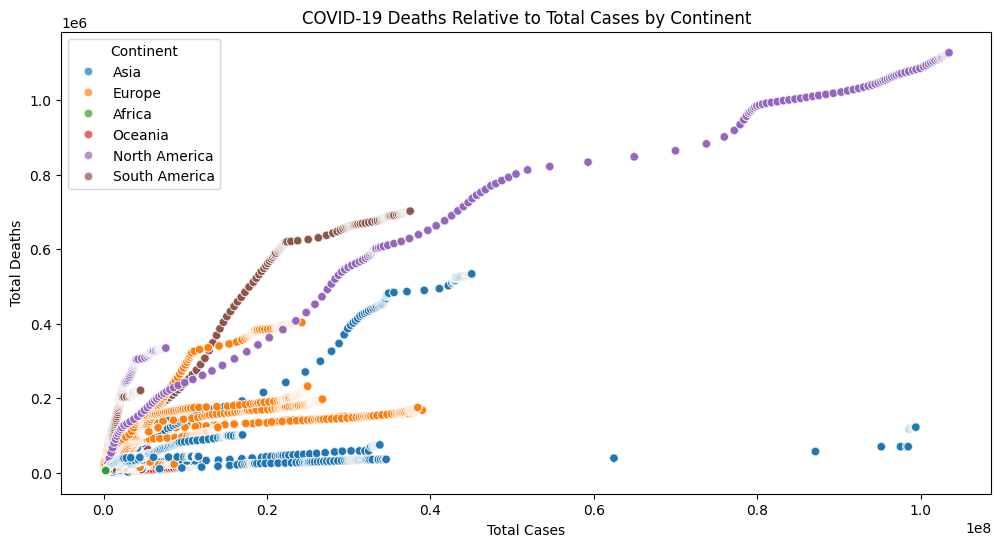

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot für Todesfälle im Verhältnis zu den Gesamtfällen
plt.figure(figsize=(12, 6))
sns.scatterplot(x='total_cases', y='total_deaths', data=data, hue='continent', alpha=0.7)
plt.title('COVID-19 Deaths Relative to Total Cases by Continent')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.legend(title='Continent')
plt.show()



3.2. The trend of new COVID-19 cases over time for each continent

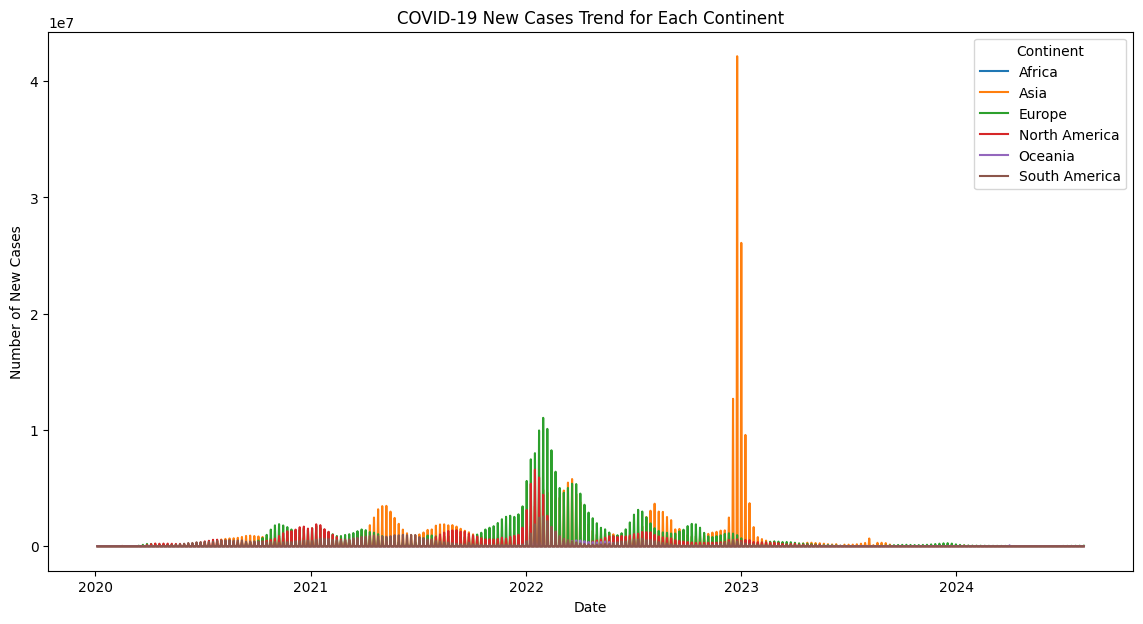

In [67]:
import matplotlib.pyplot as plt

# Group data by continent and date, and sum the new cases
continent_data = data.groupby(['continent', 'date'])['new_cases'].sum().reset_index()

# Plot new cases over time for each continent
plt.figure(figsize=(14, 7))

# Loop through each continent and plot the data
continents = continent_data['continent'].unique()
for continent in continents:
    continent_subset = continent_data[continent_data['continent'] == continent]
    plt.plot(continent_subset['date'], continent_subset['new_cases'], label=continent)

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('COVID-19 New Cases Trend for Each Continent')
plt.legend(title='Continent')
plt.show()


3.3. Heatmap that visualizes the number of new COVID-19 cases for different continents over several years

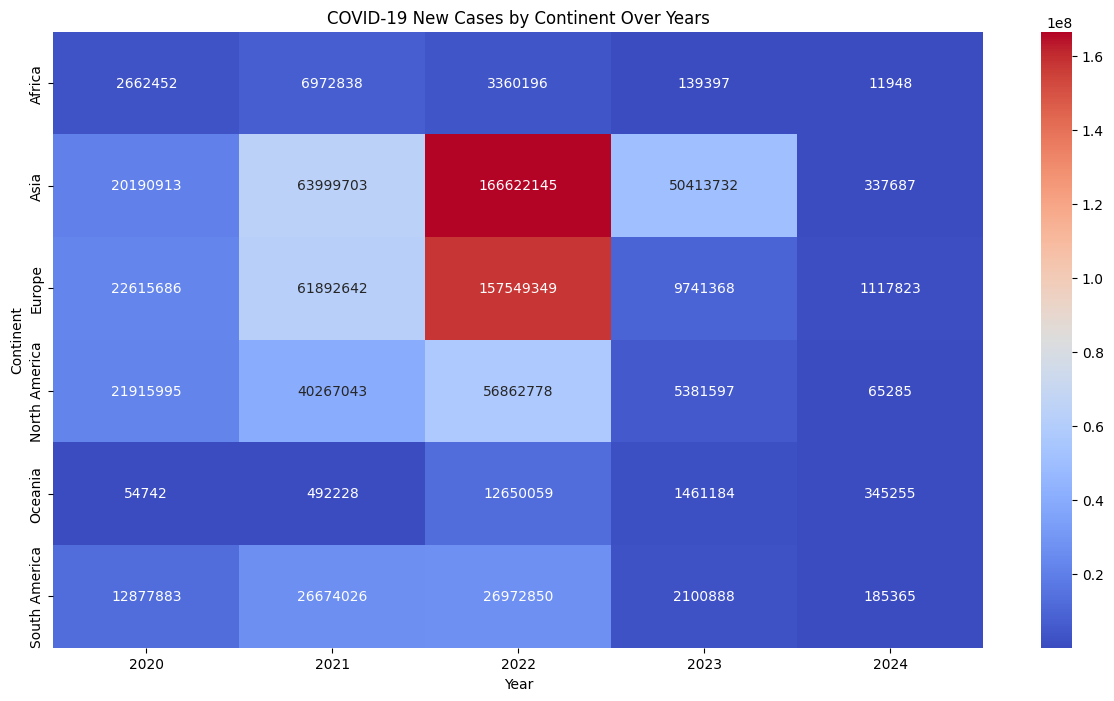

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column for the year
data['year'] = data['date'].dt.year

# Pivot table for a heatmap (years as columns, continents as rows)
heatmap_data = data.pivot_table(values='new_cases', index='continent', columns='year', aggfunc='sum')

plt.figure(figsize=(15, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, annot=True, fmt=".0f")
plt.title('COVID-19 New Cases by Continent Over Years')
plt.xlabel('Year')
plt.ylabel('Continent')
plt.show()


3.4. Bar plot to visualize total deaths from COVID-19 by year and continent

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_84319/2017550731.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='year', y='total_deaths', data=data, hue='continent', ci=None, estimator=sum)


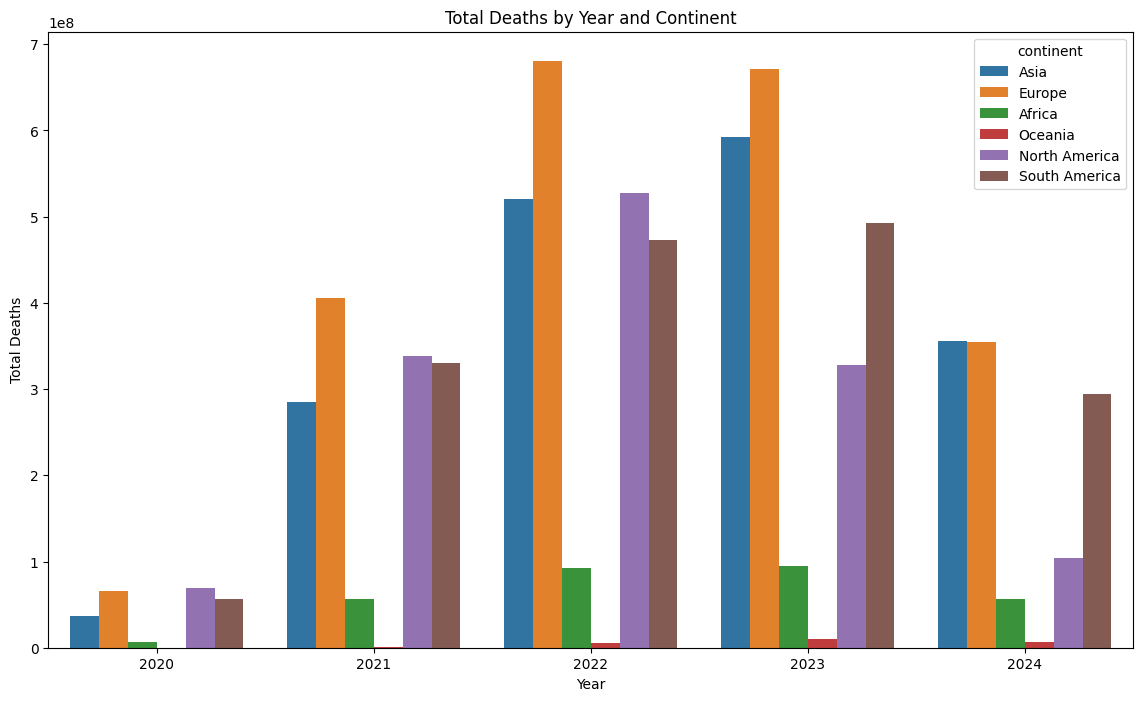

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure that the 'year' column is in the dataset
data['year'] = data['date'].dt.year

plt.figure(figsize=(14, 8))
sns.barplot(x='year', y='total_deaths', data=data, hue='continent', ci=None, estimator=sum)

# Add a title and labels
plt.title('Total Deaths by Year and Continent')
plt.xlabel('Year')
plt.ylabel('Total Deaths')

# Display the plot
plt.show()


3.5. Pie chart to visualize the distribution of total COVID-19 cases by continent

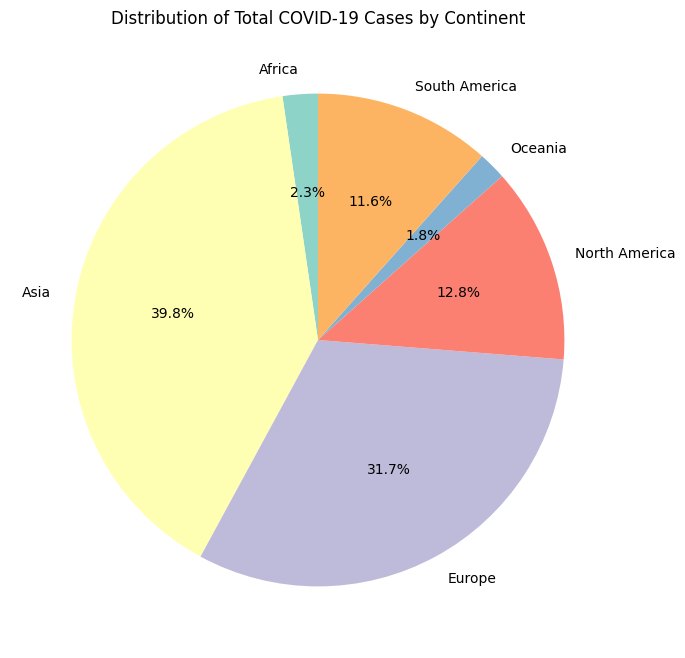

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'continent' and sum the total cases
continent_cases = data.groupby('continent')['total_cases'].sum().dropna()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(continent_cases, labels=continent_cases.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(continent_cases)))

# Title and display
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.show()


2. Countries/Continents with Higher Vaccination Rates Have Lower Mortality Rates
Create a scatter plot or bar plot showing the relationship between vaccination rates and mortality rates.


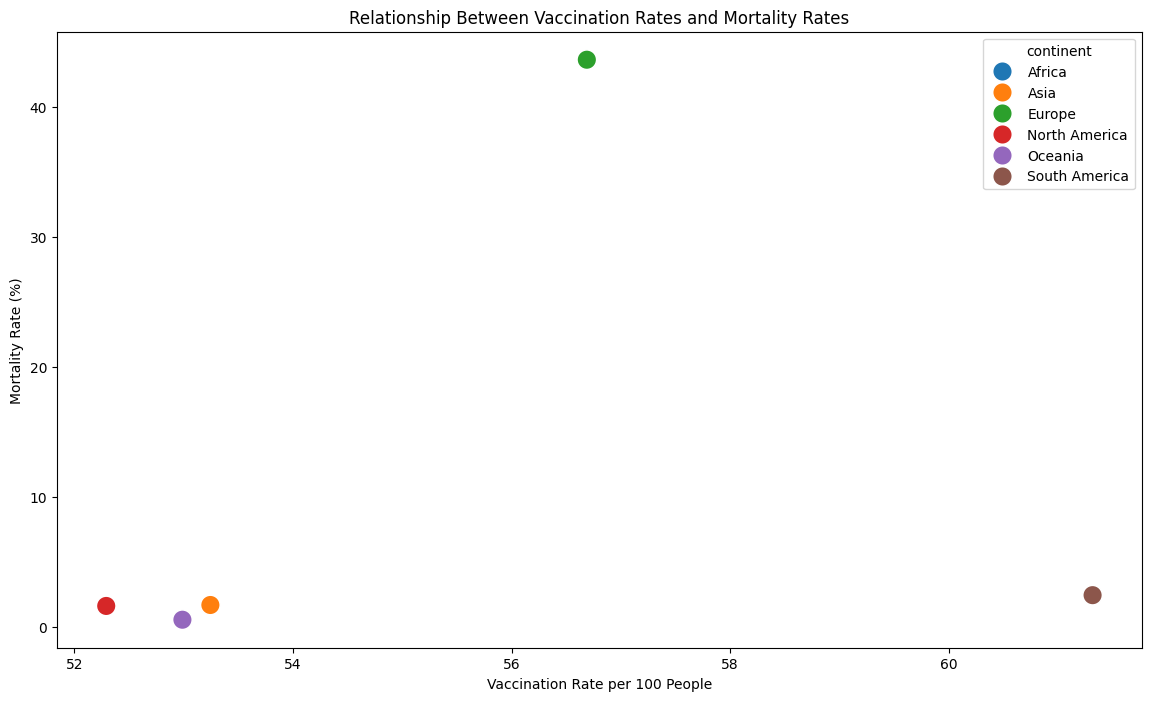

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate mortality rate if not already present
data['mortality_rate'] = (data['total_deaths'] / data['total_cases']) * 100

# Group by continent and calculate the mean vaccination and mortality rates for each continent
continent_stats = data.groupby('continent')[['people_vaccinated_per_hundred', 'mortality_rate']].mean().reset_index()

# Scatter plot for vaccination rates vs. mortality rates
plt.figure(figsize=(14, 8))
sns.scatterplot(x='people_vaccinated_per_hundred', y='mortality_rate', 
                data=continent_stats, hue='continent', s=200)

plt.title('Relationship Between Vaccination Rates and Mortality Rates')
plt.xlabel('Vaccination Rate per 100 People')
plt.ylabel('Mortality Rate (%)')
plt.show()


3. Seasonal Impact on the Speed of Virus Spread
Add a column for the season based on the date and the hemisphere of the country.
Create a line plot or heatmap to show infection trends across different seasons.

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_84319/1539085508.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='season', y='new_cases', data=data, hue='continent', estimator=sum, ci=None)


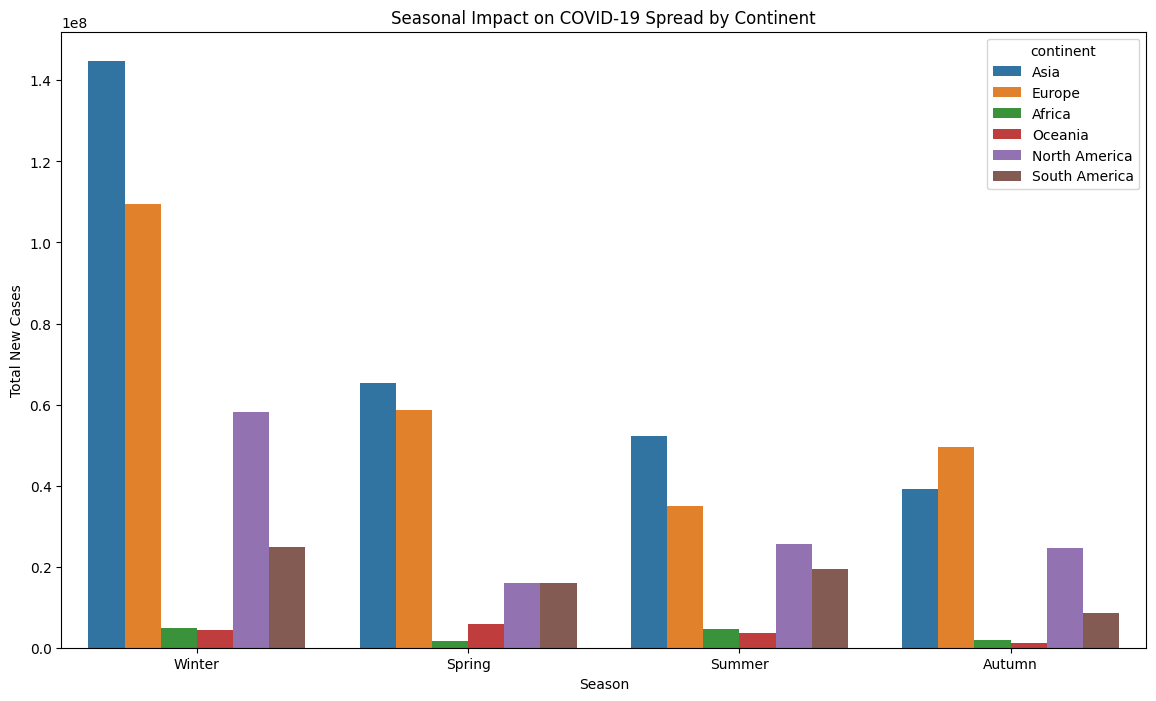

In [72]:
# Function to determine season based on date
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a 'season' column
data['season'] = data['date'].apply(get_season)

# Plot average new cases by season and continent
plt.figure(figsize=(14, 8))
sns.barplot(x='season', y='new_cases', data=data, hue='continent', estimator=sum, ci=None)
plt.title('Seasonal Impact on COVID-19 Spread by Continent')
plt.xlabel('Season')
plt.ylabel('Total New Cases')

plt.show()


Gibt es eine starke Korrelation zwischen Infektionsraten und Todesfällen?

Um die Korrelation zwischen Infektionsraten und Todesfällen zu untersuchen:
Berechnen wir die Korrelation zwischen den Spalten total_cases und total_deaths.
Verwenden auch Scatterplots und eine Regressionslinie, um visuell zu bestätigen, ob eine starke Korrelation besteht.

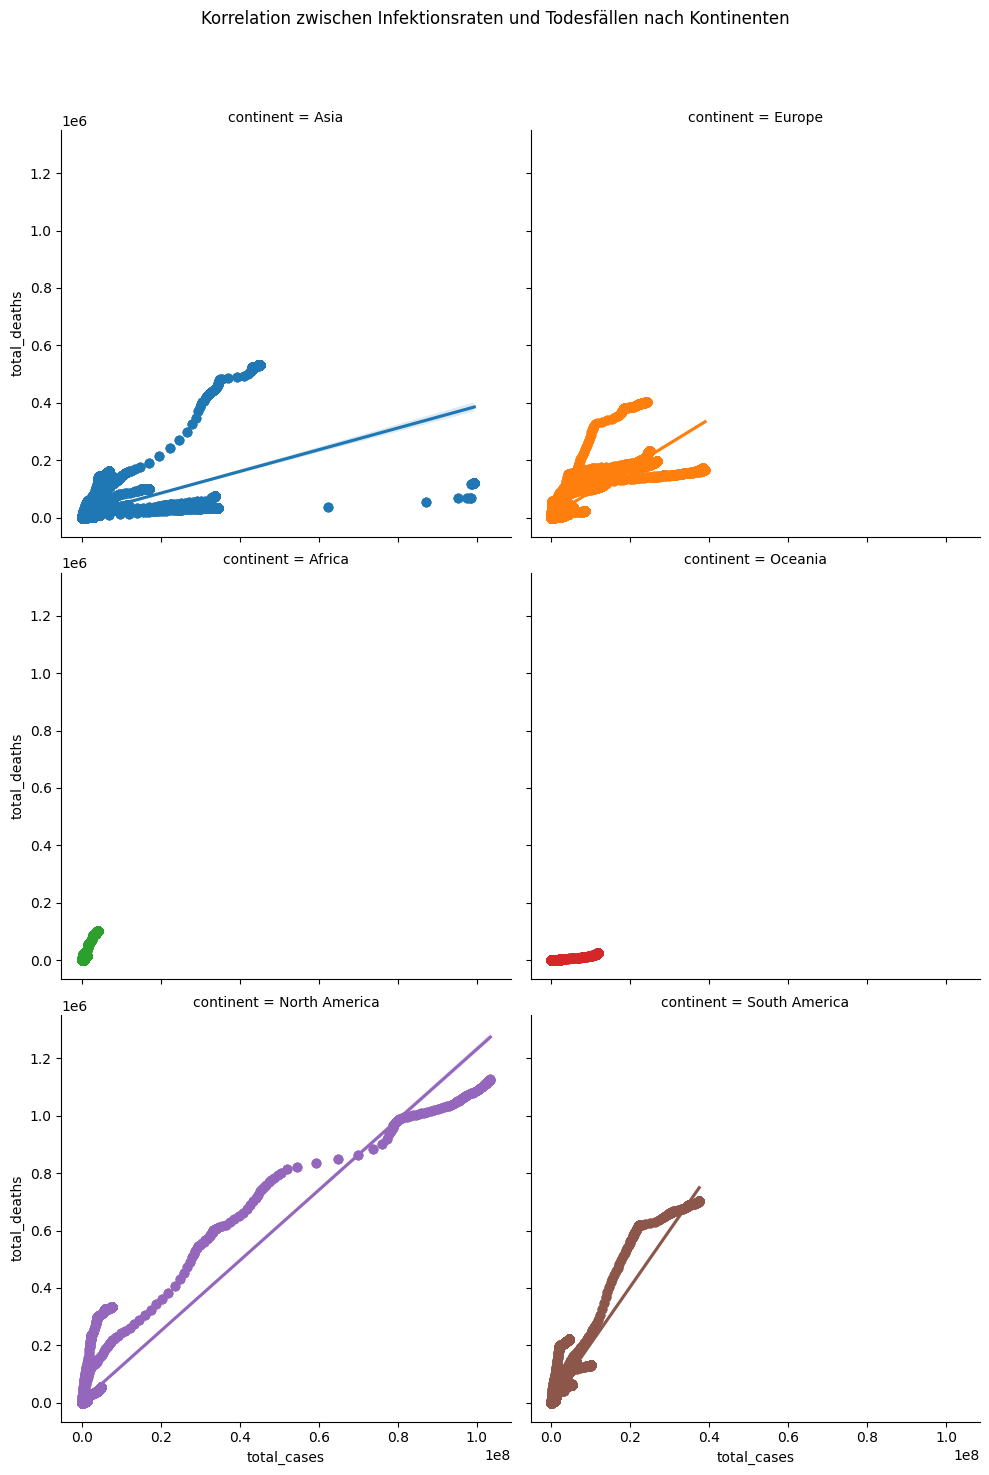

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot mit Regressionslinie nach Kontinenten, aufgeteilt in eine Matrix mit 3 Zeilen und 2 Spalten
sns.lmplot(x='total_cases', y='total_deaths', data=data, hue='continent', col='continent',
           scatter_kws={'alpha': 0.5}, height=5, aspect=1, col_wrap=2)

plt.subplots_adjust(top=0.9)
plt.suptitle('Korrelation zwischen Infektionsraten und Todesfällen nach Kontinenten')
plt.show()


Eine hohe Korrelation würde einen engen Zusammenhang zwischen zwei Variablen andeuten. Beispielsweise könnte eine positive Korrelation zwischen Infektions- und Todesraten auf eine schwache Gesundheitssystemleistung hindeuten.


Existieren Regionale Unterschiede und welche Faktoren führen zu den Unterschieden (z.B. Bevölkerungsdichte, Gesundheitssystem)

Hier können mehrere Faktoren berücksichtigt werden, wie Bevölkerungsdichte, Gesundheitssystem und wirtschaftlicher Status. Um Unterschiede zwischen Regionen zu analysieren:
Wir gruppieren die Daten nach Kontinenten und analysieren den Zusammenhang zwischen population_density, hospital_beds_per_thousand, und den Infektions-/Todeszahlen.
Ansatz:

Boxplots zur Verteilung der Infektions- und Todeszahlen pro Region.

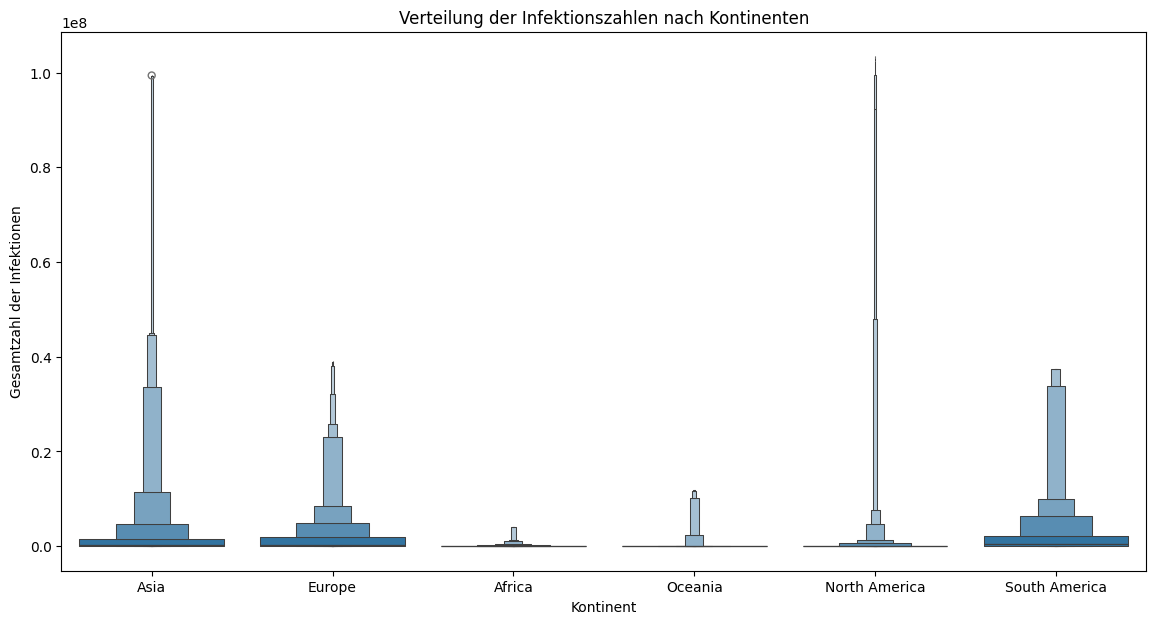

In [74]:
plt.figure(figsize=(14, 7))
sns.boxenplot(x='continent', y='total_cases', data=data)
plt.title('Verteilung der Infektionszahlen nach Kontinenten')
plt.xlabel('Kontinent')
plt.ylabel('Gesamtzahl der Infektionen')
plt.show()


Eine hohe Korrelation würde einen engen Zusammenhang zwischen zwei Variablen andeuten. Beispielsweise könnte eine positive Korrelation zwischen Infektions- und Todesraten auf eine schwache Gesundheitssystemleistung hindeuten.



Gibt es eine Verbindung zwischen Impfquote und Infektionszahlen? (Impfstatus und Infektionsgeschehen analysieren)
Um die Verbindung zwischen Impfstatus und Infektionsgeschehen zu untersuchen:

Vergleiche people_vaccinated_per_hundred mit new_cases oder total_cases.
Scatterplots und Korrelationen helfen zu visualisieren, ob eine höhere Impfquote mit niedrigeren Infektionszahlen korreliert.


Korrelation zwischen Impfquote und neuen Infektionen: 0.01


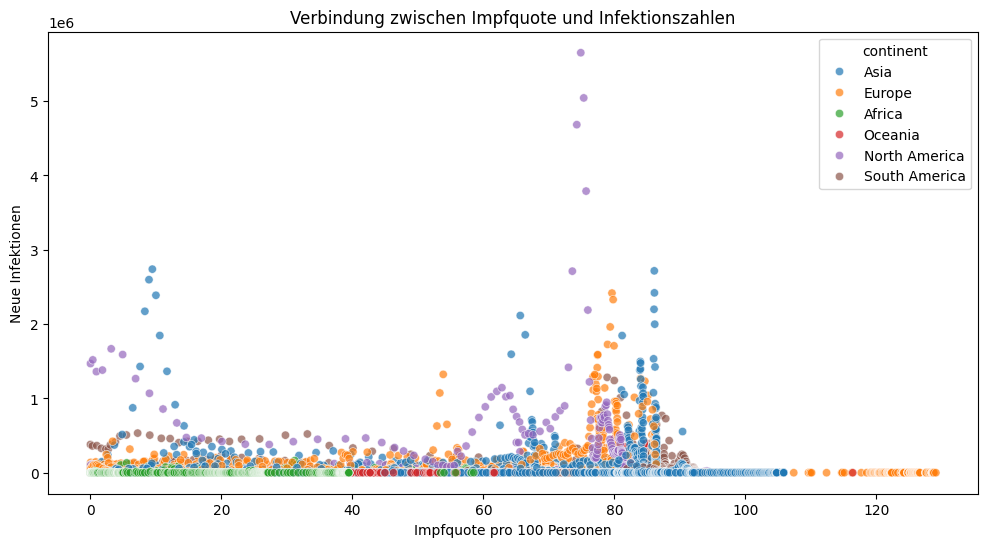

In [75]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='people_vaccinated_per_hundred', y='new_cases', data=data, hue='continent', alpha=0.7)
plt.title('Verbindung zwischen Impfquote und Infektionszahlen')
plt.xlabel('Impfquote pro 100 Personen')
plt.ylabel('Neue Infektionen')

correlation_vaccine = data[['people_vaccinated_per_hundred', 'new_cases']].corr().iloc[0, 1]
print(f"Korrelation zwischen Impfquote und neuen Infektionen: {correlation_vaccine:.2f}")

plt.show()


Ein negativer Zusammenhang zwischen Impfquote und Infektionszahlen könnte darauf hindeuten, dass Impfungen helfen, die Infektionszahlen zu senken.

Predict for COVID-19 cases and deaths over the next 10 years

using the ARIMA model in Python with statsmodels

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_84319/1625452659.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_resampled = data.resample('Y').sum()  # Resampling by year, change to 'M' for months
/Users/tatianakister/Aufgaben/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


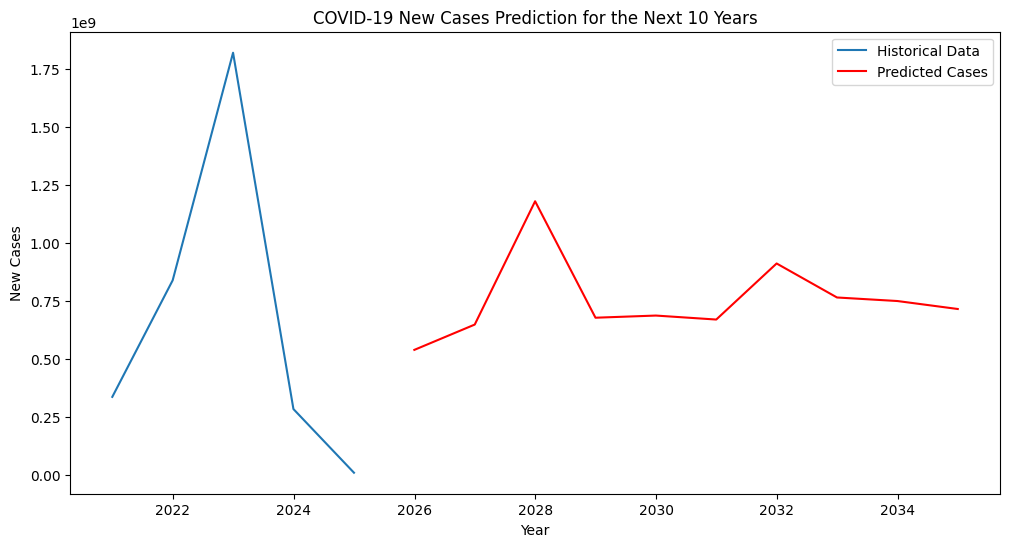

Predicted new cases for 2025: 538862913.2752692
Predicted new cases for 2026: 648048044.8084515
Predicted new cases for 2027: 1180196978.1809793
Predicted new cases for 2028: 677626724.587821
Predicted new cases for 2029: 686937196.3096697
Predicted new cases for 2030: 669745501.1950122
Predicted new cases for 2031: 911700150.8637275
Predicted new cases for 2032: 764951076.8719337
Predicted new cases for 2033: 749661378.076514
Predicted new cases for 2034: 715250389.890514


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

# Load data (ensure you have a column 'date' and 'new_cases')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Resample data by year (or month) and sum the new cases
data_resampled = data.resample('Y').sum()  # Resampling by year, change to 'M' for months

# Split into training and testing
train = data_resampled[:'2023']
test = data_resampled['2024':]

# Fit ARIMA model (adjust p, d, q for better results)
model = ARIMA(train['new_cases'], order=(5, 1, 0))  # (p, d, q) values can be adjusted
model_fit = model.fit()

# Make forecast for the next 10 years 
forecast = model_fit.forecast(steps=10)  # 10 years forecast

# Create future dates for the predictions
future_dates = [data_resampled.index[-1] + timedelta(days=365 * i) for i in range(1, 11)]

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data_resampled.index, data_resampled['new_cases'], label='Historical Data')
plt.plot(future_dates, forecast, label='Predicted Cases', color='red')
plt.title('COVID-19 New Cases Prediction for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('New Cases')
plt.legend()
plt.show()

# Print forecasted values
for year, cases in zip(future_dates, forecast):
    print(f'Predicted new cases for {year.year}: {cases}')


These predictions are generated by a statistical model based on historical trends in your data. However, several aspects need to be considered when interpreting these results

/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_84319/606135465.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_deaths = data['total_deaths'].resample('Y').sum()


/Users/tatianakister/Aufgaben/myenv/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/var/folders/0h/ypbwc3rx17j8g6cw7k7fj6700000gn/T/ipykernel_84319/606135465.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=yearly_deaths.index[-1], periods=11, freq='Y')[1:]


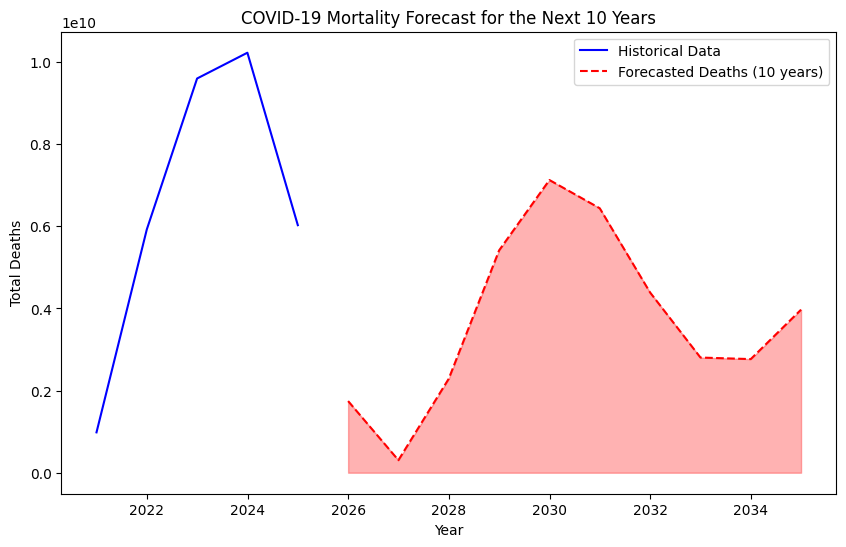

Predicted deaths for 2025: 1745269870.79
Predicted deaths for 2026: 305803514.24
Predicted deaths for 2027: 2287423201.96
Predicted deaths for 2028: 5416420452.33
Predicted deaths for 2029: 7128217449.11
Predicted deaths for 2030: 6440788268.12
Predicted deaths for 2031: 4391486205.10
Predicted deaths for 2032: 2804873335.67
Predicted deaths for 2033: 2767241898.40
Predicted deaths for 2034: 3970995251.52


In [77]:
# Resample the data by year (you can also try monthly or quarterly)
yearly_deaths = data['total_deaths'].resample('Y').sum()

# Fit ARIMA model (you may want to tune the parameters for better forecasting)
model = ARIMA(yearly_deaths, order=(5, 1, 0))  # (p, d, q) - ARIMA parameters
model_fit = model.fit()

# Forecast the next 10 years (120 months if monthly data, or 10 years for yearly data)
forecast = model_fit.forecast(steps=10)

# Create a time index for the forecasted period
forecast_index = pd.date_range(start=yearly_deaths.index[-1], periods=11, freq='Y')[1:]

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(yearly_deaths.index, yearly_deaths, label='Historical Data', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Deaths (10 years)', color='red', linestyle='--')
plt.fill_between(forecast_index, forecast, color='red', alpha=0.3)
plt.title('COVID-19 Mortality Forecast for the Next 10 Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

# Print the forecasted values
for year, deaths in zip(forecast_index.year, forecast):
    print(f"Predicted deaths for {year}: {deaths:.2f}")
